## ADAM

In [1]:
import d2l 
import math
from mxnet import * 
from mxnet.gluon import nn
npx.set_np()


In [2]:
def init_adam_states(feature_dim):
    v_w, v_b = np.zeros((feature_dim, 1)), np.zeros(1)
    s_w, s_b = np.zeros((feature_dim, 1)), np.zeros(1)
    return ((v_w, s_w), (v_b, s_b))

def adam(params, states, hyperparams):
    beta1, beta2, eps = 0.9, 0.999, 1e-6
    for p, (v,s) in zip(params, states):
        v[:] = beta1 * v + (1-beta1) * p.grad
        s[:] = beta2 * s + (1-beta2) * np.square(p.grad)
        v_bias_corr = v / (1 - beta1 ** hyperparams['t'])
        s_bias_corr = s / (1 - beta2 ** hyperparams['t'])
        p[:] -= hyperparams['lr'] * v_bias_corr / (np.sqrt(s_bias_corr) + eps)
    hyperparams['t'] += 1

loss: 0.248, 0.095 sec/epoch


([0.10571765899658203,
  0.18849611282348633,
  0.2762715816497803,
  0.37900519371032715,
  0.46776843070983887,
  0.5575268268585205,
  0.6522643566131592,
  0.756983757019043,
  0.8577139377593994,
  0.9414694309234619,
  1.044194221496582,
  1.133958339691162,
  1.232703685760498,
  1.3314392566680908,
  1.4241859912872314],
 [0.3820401130914688,
  0.3149603582819303,
  0.27748880970478057,
  0.2592671189705531,
  0.24947995940844217,
  0.2476844706137975,
  0.24388210395971935,
  0.24467816321055094,
  0.2457515323360761,
  0.24669481239716212,
  0.24708408323923747,
  0.24788991789023082,
  0.24542610851923624,
  0.24290468374888102,
  0.2483197696208954])

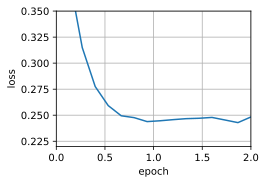

In [3]:
data_iter, feature_dim = d2l.get_data_ch11(batch_size=10)
d2l.train_ch11(adam, init_adam_states(feature_dim), {'lr': 0.01, 't': 1}, data_iter, feature_dim)

loss: 0.245, 0.042 sec/epoch


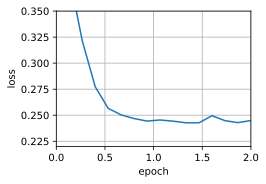

In [4]:
d2l.train_gluon_ch11('adam', {'learning_rate': 0.01}, data_iter)

## YOGI

In [5]:
def yogi(params, states, hyperparams):
    beta1, beta2, eps = 0.9, 0.999, 1e-3
    for p, (v, s) in zip(params, states):
        v[:] = beta1 * v + (1- beta1) * p.grad
        s[:] = s + (1-beta2) * np.sign(np.square(p.grad) - s) * np.square(p.grad)
        v_bias_corr = v / (1 - beta1 ** hyperparams['t'])
        s_bias_corr = s / (1 - beta2 ** hyperparams['t'])
        p[:] -= hyperparams['lr'] * v_bias_corr / (np.sqrt(s_bias_corr) + eps)
    hyperparams['t'] += 1

loss: 0.242, 0.098 sec/epoch


([0.09574317932128906,
  0.1934814453125,
  0.2952001094818115,
  0.38495945930480957,
  0.47771191596984863,
  0.5824313163757324,
  0.6941328048706055,
  0.7968621253967285,
  0.886622428894043,
  0.9744017124176025,
  1.0631639957427979,
  1.1648917198181152,
  1.262629747390747,
  1.36336088180542,
  1.4690759181976318],
 [0.3762432949542999,
  0.3110298547744751,
  0.27926631991068523,
  0.25940738163391747,
  0.2494626117149989,
  0.24703994077444077,
  0.24297635575135548,
  0.2458009369770686,
  0.24409558482964833,
  0.24287810985247293,
  0.2433671530087789,
  0.24273990177114804,
  0.24289117908477784,
  0.24291019062201183,
  0.24221078316370645])

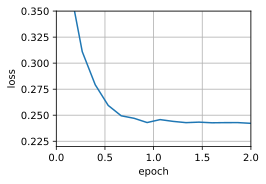

In [6]:
data_iter, feature_dim = d2l.get_data_ch11(batch_size=10)
d2l.train_ch11(yogi, init_adam_states(feature_dim),
              {'lr': 0.01, 't': 1}, data_iter, feature_dim)